# Limpieza y Preprocesado de Datos - Dataset LendingClub

Esta primera parte constituye la limpieza inicial del dataset extraído desde la fuente primaria, así como la inserción adicional de información para cumplir con los requisitos de negocio establecidos. 

### **Análisis a realizar**:
 Realizar el preprocesamiento de datos y construir un modelo de predicción de aprendizaje profundo.

### **Columnas y Definiciones**

- **credyt.policy**
    - 1 => Si el cliente cumple con los criterios de suscripción de crédito
    - 0 => Si no los cumple

- **Porpuse**: Propósito del préstamo (tarjeta_credito, debt_consolidation, education, home_improvement, major_purchase, small_bussines all_other)

- **int.rate**: Tipo de interés del préstamo, expresado como proporción (un tipo del 11 % se almacenaría como 0,11). Los prestatarios que LendingClub.com considera más riesgosos reciben tipos de interés más altos.

- **log.annual.inc**: El logaritmo natural del ingreso anual declarado por el prestatario.

- **dti**: La relación deuda-ingreso del prestatario (monto de deuda dividido por el ingreso anual).

- **fico**: La puntuación de crédito FICO del prestatario.

- **days.with.cr.line**: El número de días que el prestatario ha tenido una línea de crédito.

- **revol.bal**: El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta de crédito).

- **revol.util**: Tasa de utilización de la línea de crédito renovable del prestatario (la cantidad de la línea de crédito utilizada en relación con el crédito total disponible).

- **inq.last.6mths**: Número de consultas de los acreedores al prestatario en los últimos 6 meses.

- **delinq.2yrs**: La cantidad de veces que el prestatario tuvo un retraso de pago de más de 30 días en los últimos 2 años.

- **pub.rec**: Número de registros públicos negativos del prestatario (declaraciones de quiebra, gravámenes fiscales o sentencias).

- **not.fully.paid**: Verificar si pagó o no completamente 
    - True (1) = No pagó completamente
    - False(0) = Pagó totalmente

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
input_dir = '..\\csv\\start'
output_dir = '..\\csv\\proccess'

#### **Lectura del modelo obtenido**

Importamos la información desde el csv

In [ ]:
input_name = 'loan_data.csv'
input_filename = os.path.join(input_dir, input_name)

In [ ]:
loan_origin = pd.read_csv(input_filename)

In [13]:
loan_origin

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


#### **Filtrado de Datos**
***Verificamos si existen datos nulos***

In [14]:
loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


No existe ningún valo nulo, aunque en base al Dtype vemos que existen variables object

##### ***Verificamos si hay datos negativos***

Vemos la cantidad de categorías

In [15]:
for element in loan_origin.columns:
    print(f"Column: {element}, Cant_Values: {loan_origin[element].nunique()}")

Column: credit.policy, Cant_Values: 2
Column: purpose, Cant_Values: 7
Column: int.rate, Cant_Values: 249
Column: installment, Cant_Values: 4788
Column: log.annual.inc, Cant_Values: 1987
Column: dti, Cant_Values: 2529
Column: fico, Cant_Values: 44
Column: days.with.cr.line, Cant_Values: 2687
Column: revol.bal, Cant_Values: 7869
Column: revol.util, Cant_Values: 1035
Column: inq.last.6mths, Cant_Values: 28
Column: delinq.2yrs, Cant_Values: 11
Column: pub.rec, Cant_Values: 6
Column: not.fully.paid, Cant_Values: 2


In [17]:
list_column = list(loan_origin.columns)

C:\Users\llano\AppData\Local\Temp\ipykernel_13164\3202179608.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
C:\Users\llano\AppData\Local\Temp\ipykernel_13164\3202179608.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
C:\Users\llano\AppData\Local\Temp\ipykernel_13164\3202179608.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
C:\Users\llano\AppData\Local\Temp\ipykernel_13164\3202179608.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

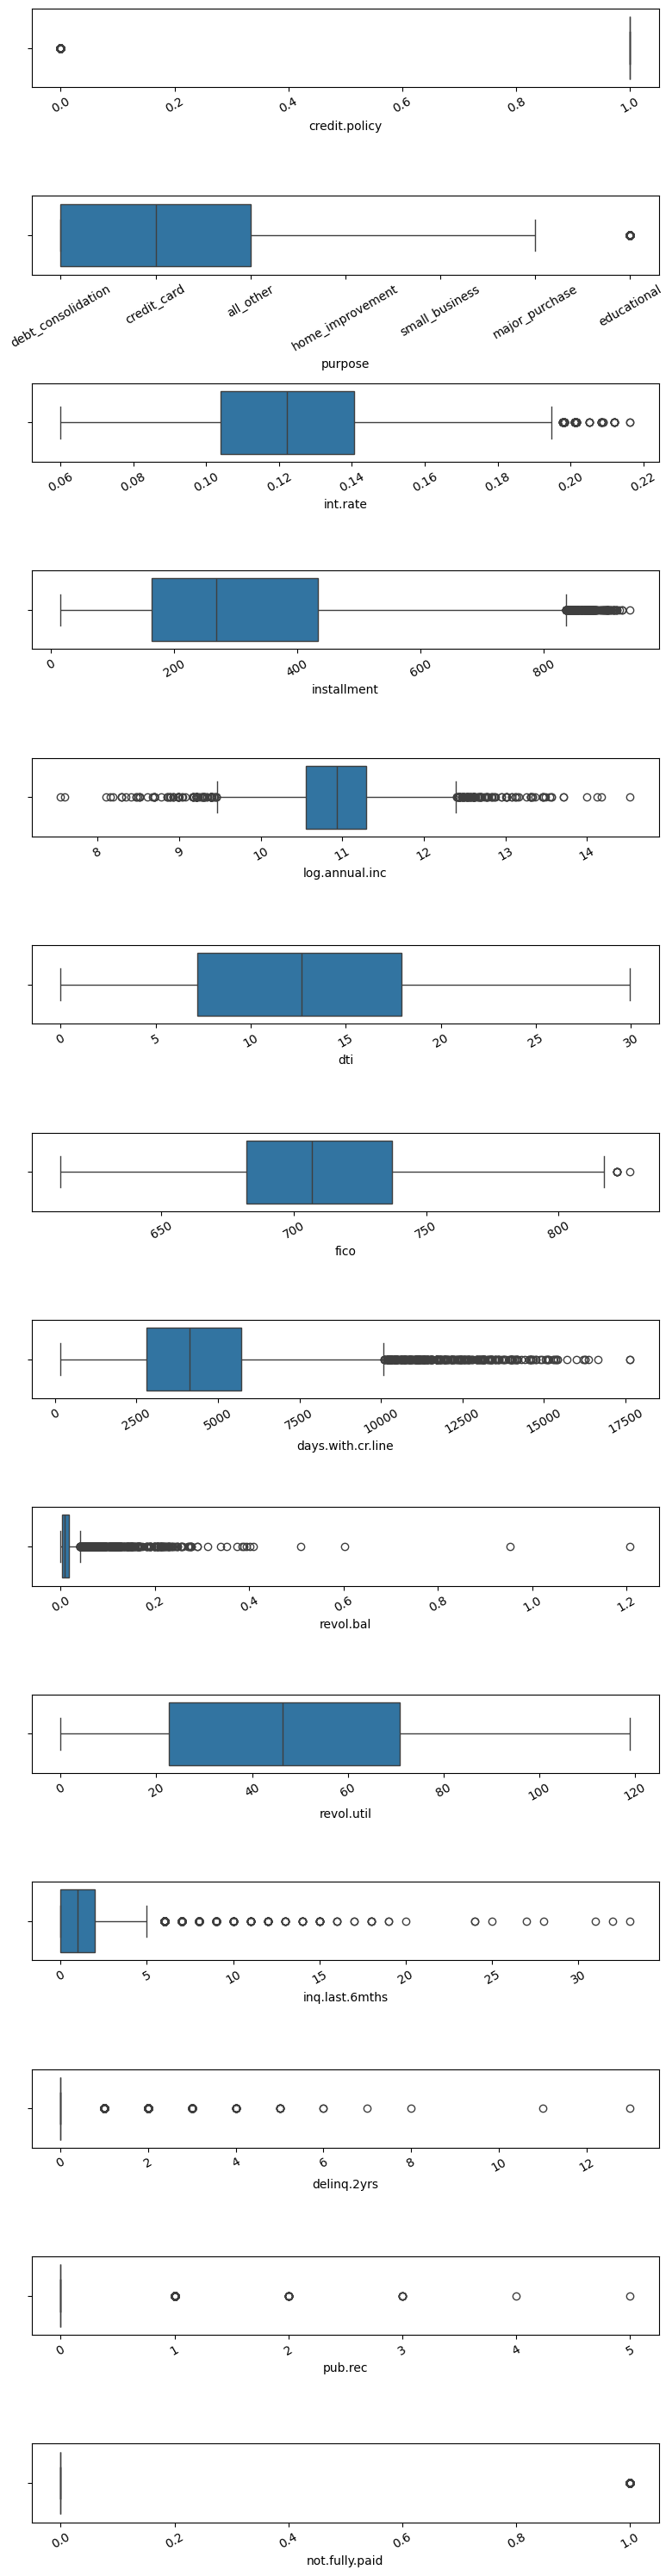

In [19]:
fig, ax = plt.subplots(figsize=(8,30),ncols=1, nrows=len(list_column))
fig.subplots_adjust(hspace=2)
# fig.suptitle("Columns DataMora", fontsize=15)

for id,item in enumerate(list_column):
    ax = fig.axes[id]
    sns.boxplot(loan_origin, x=item, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    
fig.tight_layout()
fig.show()


#### **Cambiamos los tipos de dato**

- Algunos datos antes vistos con la información son "object". Estos datos serán cambiados a "string"
- A su vez, también se cambiará el tipo de dato "float" de days_with_cr_line por "int"

Las columnas de tipo "Object" son "Purpose"

In [20]:
loan_origin["purpose"] = loan_origin["purpose"].astype("string")

In [26]:
loan_origin["days.with.cr.line"] = loan_origin["days.with.cr.line"].astype("int")

In [27]:
loan_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   string 
 2   int.rate           9578 non-null   float64
 3   fee                9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   int64  
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(5), int64(8), string(1)
memory usage: 1.0 MB


#### **Cambiamos el nombre de una de las columnas**

Cambiamos el nombre de la propiedad "~~installmente~~" a "**fee**"

In [22]:
loan_origin= loan_origin.rename(columns={"installment": "fee"})

In [23]:
loan_origin.head(10)

,credit.policy,purpose,int.rate,fee,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


#### ***Por último, exportamos el csv una vez analizados todos los puntos***
Así como normalizado

In [31]:
output_name = 'loan_origin.csv'
output_filename = os.path.join(output_dir, output_name)

In [32]:
loan_origin.to_csv(output_filename, index=False)